# BIOMEDIN 260/RAD260: Problem Set 3 - Mammogram Project

## Spring 2021

## Name 1:

Trey Turner

## Name 2:

SECOND COLLABORATOR'S NAME HERE

## Introduction

Breast cancer has the highest incidence and second highest mortality rate for women in the US.

Your task is to utilize machine learning to study mammograms in any way you want (e.g. classification, segmentation) as long as you justify why it is useful to do whatever it is you want to do. Turning in a deep dream assignment using mammograms might be amusing, for example, but not so useful to patients. That being said, choose something that interests you. As the adage goes, "do what you love, and you’ll never have to work another day in your life, at least in BMI 260."

Treat this as a mini-project. We highly encourage working with 1 other person, possibly someone in your main project team. 

In addition to the mammograms themselves, the dataset includes "ground-truth" segmentations and `mass_case_description_train_set.csv`, which contains metadata information about mass shapes, mass margins, assessment numbers, pathology diagnoses, and subtlety in the data. Take some time to research what all of these different fields mean and how you might utilize them in your work. You dont need to use all of what is provided to you.

Some ideas:

1. Use the ROI’s or segmentations to extract features, and then train a classifier based on those features using the algorithms presented to you in the machine learning lectures (doesn't need to use deep learning).

2. Use convolutional neural networks. Feel free to use any of the code we went over in class or use your own (custom code, sklearn, keras, Tensorflow etc.). If you dont want to place helper functions and classes into this notebook, place them in a `.py` file in the same folder called `helperfunctions.py` and import them into this notebook.

## Data

The data is here:

https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM

## Grading and Submission

This assignment has 3 components: code, figures (outputs/analyses of your code), and a write-up detailing your mini-project. You will be graded on these categories.

If you're OK with Python or R, please place all three parts into this notebook/.Rmd file that we have provided where indicated. We have written template sections for you to follow for simplicity/completeness. When you're done, save as a `.pdf` (please knit to `.pdf` if you are using `.Rmd`, or knit to `.html` and use a browser's "Print" function to convert to `.pdf`).

If you don't like Python OR R, we will allow you to use a different language, but please turn your assignment in with: 1) a folder with all your code, 2) a folder with all your figures, and 3) a `.tex`/`.doc`/`.pdf` file with a write-up.

## A U-Net Mammogram Segmentation Model

**1. Describe what you are doing and why it matters to patients using at least one citation.**

    The main goal of my project is to build an image segmentation model for processing mammograms with potential abnormalities which can reliably reproduce the ground truth segmentation masks (or lack thereof) made by experts. 

    As technology continues to improve and the cost and difficulty of getting a mammogram recedes for American women, common advice is to "screen earlier and more often" when it comes to breast cancer. And there's good logic behind this advice; according to the American Cancer Society, early-stage breast cancer has a five-year survival rate of 99 percent whereas later-stage cancer has a survival rates of 27 percent. Furthermore, for women finding solace in a lack of a family history of breast cancer, more than 75 percent of women who have breast cancer have no family history.

    However, manually processing mammograms is a time-intensive task that requires trained experts and so is very expensive to do at scale. An ideal solution for this problem would be some way to automatically process the scans digitally with satisfactory (or at least comparable) accuracy and reliability, which brings me back to my project. 

    As dicussed later in the writeup, the segmentation model that I built is limited in its usefullness to the extent that it has only ever seen scans of breasts containing abnormalities and so is not equipped to classify a mammogram as either healthy or potentially abnormal. That said, if the first step of processing a newly obtained mammogram is to run it through a classifier that can make this distinction, then afterwards my model could be used to produce an initial set of segmentation masks for the scans classified as potentially abnormal with the goal of decreasing the amount of time it takes for a radiologist to manually review the scans. 

### Sources
https://www.hopkinsmedicine.org/health/conditions-and-diseases/breast-cancer/6-mammogram-myths#:~:text=Myth%20%231%3A%20I%20don',of%20symptoms%20or%20family%20history


**2. Describe the relevant statistics of the data. How were the images taken? How were they labeled? What is the class balance and majority classifier accuracy? How will you divide the data into testing, training and validation sets?**

## -----

    Our data set, the CBIS-DDSM (Curated Breast Imaging Subset of DDSM), is a subset of the DDSM data that has been selected and curated by a trained mammographer and includes decompressed images, updated mass segmentation, and pathologic diagnosis for training data, formatted similarly to modern computer vision data sets. (1,2)

    Mass present in 99.9% of scans so in that sense the Majority Classifier accuracy would also be 99.9%. Since I built an image segmentation model (classifying pixels not lesions), though, this statistic is not so much relevant to the model that I built, but rather it is an ugly characteristic of the data I used to train the model. However, since my image segmentation model is a pixel-by-pixel binary classifier it might be more meaningful to interpret class balance and majority classifier accuracy in terms of pixel prevalence: what proportion of all of the pixels should be classified as constituting an abnormality? 
    Using this pixel-wise interpretation we get a class balance of around 9%, so we can say that the majority classifier accuracy (predicting all normal tissue in every scan) would be 93% using this interpretation. Though the "ground-truth" masks are imperfect, they are expertly curated and thus provide a reasonable approximation of the true class balance.
         
    With regards to dividing up the data, I use a built-in Scikit method (from sklearn.model_selection import train_test_split) to randomly separate a group of curated data into 90% train and 10% validation (I used the cropped ROI scans as another test set but very little). 
## -----

### Sources
https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM#225166295e40bd1f79d64f04b40cac57ceca9272
https://www.nature.com/articles/sdata2017177

**3. Describe your data pipeline (how is the data scrubbed, normalized, stored, and fed to the model for training?).**

## -----

    1. mass_case_description csv read into pandas dataframe

    2. get scan from data directory using massDescriptions rows

    3. filter out inconsistencies between dataframe and files in data directory (not all rows in the dataframe are actually in the data folder and vice versa)

    4. split file into input_img and gt_mask

    5. binarize gt_mask (0 threshold)

    6. normalize and boost input image contrast using CLAHE

    7. full (or subset of) dataset compiled and broken into train/validation @ 90/10 for development

## -----

**4. Explain how the model you chose works alongside the code for it. Add at least one technical citation to give credit where credit is due.**

## ----- ##

    Given it's status in the image segmentation community, for my goal of segmenting scans into normal and abnormal tissue I settled on building a UNet with the encoder being comprised of 4 compressive blocks and the decoder of 4 decompressive blocks where each convolution is done with a 3x3 kernel. UNets are powerful tools for image segmentation tasks because UNets are able to do image localisation by predicting the image segmentation pixel by pixel. Since my purposes require making a binary mask prediction based on an input image, my UNet is basically acting as a pixel-by-pixel binary classifier for distinguishing abnormal tissue from normal breast tissue. Below is one of the many articles I read in preparation for building my UNet (1). 

    Since the most realistic version of my overall goal involves preparing binary masks for as-of-yet un-reviewed mammograms in preparation for expert review, I decided early on that blank predictions (masks containing no predicted abnormalities) were something I wanted to keep a close eye on and try to minimize (i.e. FN's are worse than FP's in this context). To do this I tracked and compared each model's "sensitivity at specificity=0.5" curve so that I could further assess my model's performance when it is allowed to predict aggressively (a characteristic that I am still trying to develop further in my model).


## ----- ##

### Sources
https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5 

original UNet paper: https://arxiv.org/abs/1505.04597

**5. There are many ways to do training. Take us through how you do it (e.g. "We used early stopping and stopped when validation loss increased twice in a row.").**

    The actual training portion of my process is handled automatically by tensorflow after I build the model structure and set the training preferences, so I will focus on the decisions I had to make in the leadup to training. Because I wasn't sure how much training would be required I passed several callback functions along with the test and validation data to tensorflow to help optimize training hyperparameters and save myself time. These included a callback to reduce the learning rate by a factor of 10 if learning progress plateaus, a callback to enforce early stopping if for 10 consecutive epochs validation loss does not decrease, and a callback to save the weights associated with the lowest validation loss in case the model started to over-fit to the test data. After a few overnight training sessions I settled on binary-cross-entropy as the best loss function, 50 epochs as being sufficient time to train, and a minimum learning rate $\eta$ = 0.00001 as my training hyperparameters. Additionally, to try to gain further insight into how my model was learning and performing I tracked loss, binary accuracy, and (later on) "sensitivity at specificity=0.5" for the training and validation sets as the model trained.


**6. Make a figure displaying your results.**

## ----- ##

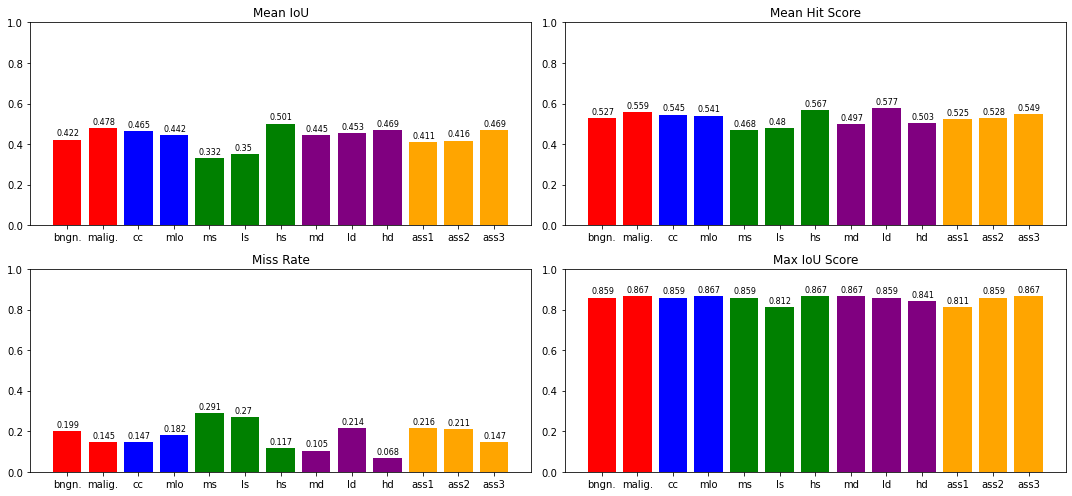

In [1082]:
#There are many, many figures below but here is one cummulative figure displaying model performace on subsets of dataset
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i in range(4):
    data = []
    for j in range(len(all_stats)):
        data.append(all_stats[j][1][i])
    ax[int(i/2)][i%2].bar(x=np.arange(len(x_labels)), height=data, tick_label=x_labels, color=colors)
    ax[int(i/2)][i%2].set_title(titles[i])
    ax[int(i/2)][i%2].set_ylim([0, 1])
    for idx, val in enumerate(data):
        ax[int(i/2)][i%2].text(x=idx-0.3 , y =val+0.02 , s=f"{round(val,3)}" , fontdict=dict(fontsize=8))
    
fig.tight_layout()

    The above figure shows how my model performed on various subsets of my dataset in terms of an IoU (Intersection over Union) score of the model-predicted binary masks as compared to the provided ground-truth masks. Each plot displays a different statistic (defined below) and each set of colored bars corresponds to a the complete dataset being broken into subsets according to one of pathology (benign/malignant), view type (CC/MLO), subtlety rating ([1-2],[3],[4-5]), breast density ([1-2],[3],[4-5]) or assessment type ([0],[2-3],[4-5]) (1).

    - Miss Rate: Frequency with which model gets an IoU score = 0 (0 correctly classified pixels in scan)
    - Mean IoU: Average IoU score of models predictions on all scans in subset
    - Mean Hit Score: The average IoU score of predictions with "misses" (see Miss Rate) not taken into account
    - Max IoU: Max IoU score achieved by model

## ----- ##

### Sources
For splitting by assessment type: https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/mammograms/understanding-your-mammogram-report.html

**7. Discuss pros and cons of your method and what you might have done differently now that you've tried or would try if you had more time.**

## ----- ##

    At this point in the project I am much more familiar with what I feel are the cons of my method than the pros so that's where I want to start. The flaw which most concerns me regards the constitution of my training and validation data: I didn't train on any healthy breasts! So as far as what I would like to have done differently, the conversation starts and stops with the input data and being more careful in and attentive to the process of curating the training and validation sets. 

    There are numerous aspects of my project that I would like to pursue further with more time. After curating a more balanced dataset I would like to remove irrelevant artefacts, labels, flecks and any other accessories from the scans and experiment with augmenting the cleaned data (just flips and translations) as discussed in lecture and also in the UNet author's original paper on the subject in order to make more efficient use of the available data. I would like to add additional input features that would be reasonable to expect to be present in practice such as the orientation of the scan (MLO vs CC) and the breast density. I would also like to experiment with regularization parameters to encourage or discourage certain characteristics of the predicted output such as removing or connecting small disconnected regions of the mask and enforcing a preference for round or ovular mask predictions.
    
    I think that one of the biggest pros of my approach is that I made lots of plots. Initially this was to try to better understand if my model was doing a good job / if there were certain features or scan types with which it really struggled. Several iterations of this (plotting, analyzing, tweaking hyper-parameters and further processing data, repeat) ended up being pretty much as far as I got. Anyway, I was pretty meticulous in saving plots and model statistics for each of the models that I trained. This data is a little bit noisy due to variations in train/test splits but overall is a good indicator for which hyperparameters let to a successful model.
    Additionally, as a result of this process I have learned that:
    -A 5x5 kernel does not produce high enough resolution to effectively handle this dataset (as 256x256 arrays)
    -the ground-truth masks that come with the dataset are not binary images
    -picking a different threshold for binary mask predictions is arbitrary
    -spending extra time organizing your dataset at the beginning will pay dividends
    -small errors make a big difference when your model spends half a day learning
    
    
Overall I thought this project was really cool! Thank you!

## ----- ##

### Sources
original UNet paper: https://arxiv.org/abs/1505.04597

**You will not be graded on the performance of your model. You'll only be graded on the scientific soundness of your claims, methodology, evaluation (i.e. fair but insightful statistics), and discussion of the strengths and shortcomings of what you tried. Feel free to reuse some of the code you are/will be using for your projects. The write-up doesn't need to be long (~1 page will suffice), but please cite at least one clinical paper and one technical paper (1 each in questions 1 and 4 at least, and more if needed).**

In [709]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import pandas as pd

In [710]:
featureMatrix = pd.read_csv('features_matrix.csv')
print(featureMatrix.head())

         Unnamed: 0     ASM      Area  Centroid_x  Centroid_y  Contrast  \
0   P_00001_LEFT_CC  0.9830  120561.0    0.549230    0.146999    0.0028   
1  P_00001_LEFT_MLO  0.9947   32198.0    0.645281    0.141495    0.0020   
2   P_00004_LEFT_CC  0.9858  113289.0    0.675677    0.540258    0.0036   
3  P_00004_LEFT_MLO  0.9889   89475.0    0.591458    0.605354    0.0035   
4  P_00004_RIGHT_CC  0.9857  108026.0    0.485827    0.353910    0.0028   

   Dissimilarity  Eccentricity  Energy  Homogeneity  Max intensity  \
0         0.0016      0.535626  0.9914       0.9994     199.011673   
1         0.0008      0.316796  0.9973       0.9997     195.498054   
2         0.0015      0.377010  0.9929       0.9995     195.669261   
3         0.0017      0.384364  0.9944       0.9993     189.046693   
4         0.0011      0.596902  0.9928       0.9996     212.918288   

   Mean intensity  Min intensity  Orientation    Perimeter  \
0      141.641546      88.326848    -1.446904  2917.294731   
1   

In [5]:
massDescriptions = pd.read_csv('mass_case_description_train_set.csv')
#print(massDescriptions.head())
massDescriptions[massDescriptions["patient_id"].isin(["P_00009"])]

patient_id  breast_density   side view  abn_num mass_shape mass_margins  \
5    P_00009               3  RIGHT   CC        1       OVAL  ILL_DEFINED   
6    P_00009               3  RIGHT  MLO        1       OVAL  ILL_DEFINED   

   assessment  pathology  subtlety                               od_img_path  \
5           4  MALIGNANT         4  Mass_Training_full_mammogram_images.jnlp   
6           4  MALIGNANT         4  Mass_Training_full_mammogram_images.jnlp   

                                    od_crop_path  \
5  Mass-Training_ROI-mask_and_crpped_images.jnlp   
6  Mass-Training_ROI-mask_and_crpped_images.jnlp   

                                       mask_path  
5  Mass-Training_ROI-mask_and_crpped_images.jnlp  
6  Mass-Training_ROI-mask_and_crpped_images.jnlp

# My First U-Net

Need an array of images and array of masks (that line up) - all_ims has both, just need to separate two layers



In [957]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from tensorflow.python.keras.layers.core import Lambda, RepeatVector, Reshape
from tensorflow.python.keras.layers.convolutional import Conv2D, Conv2DTranspose
from tensorflow.python.keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from tensorflow.python.keras.layers.merge import concatenate, add
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import random
import cv2
import csv

### Helper function for get_unet() that executes the convolution step of each computation block

In [119]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

### Define U-Net model structure

Much credit to https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5

In [120]:
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters*8, kernel_size=3, batchnorm=batchnorm)
    
    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters*4, kernel_size=3, batchnorm=batchnorm)
    
    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters*2, kernel_size=3, batchnorm=batchnorm)
    
    u9 = Conv2DTranspose(n_filters, (3, 3), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

### Prep data for training

In [927]:
dataset, total_samples = get_filtered_dataset()
X, y = split_XY(dataset)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

1316


Argggg I trained for 4 hours on partially bad data and now have a really conservative predictor.

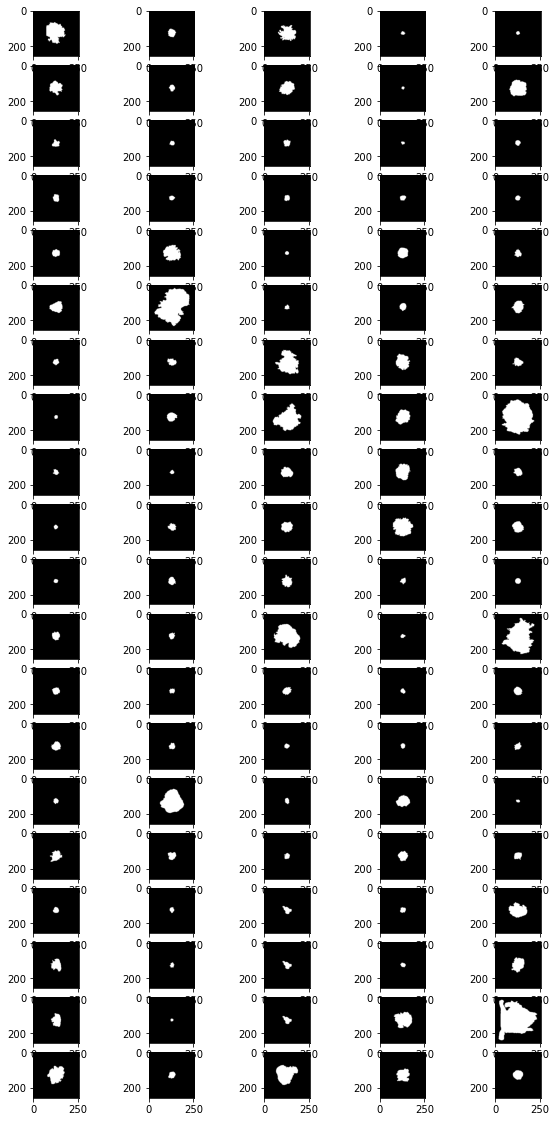

In [838]:
fig, ax = plt.subplots(20, 5, figsize=(10,20))
for i in range(20):
    for j in range(5):
        ax[i][j].imshow(y[i+j*20], cmap='gray')
    
#fig.tight_layout()
plt.show()

## Build and Train Model

In [930]:
input_img = Input((im_height, im_width, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
m = tf.keras.metrics.SensitivityAtSpecificity(0.5)
model.compile(optimizer=Adam(), loss=bce, metrics=["binary_accuracy", m])

In [931]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_267 (Conv2D)             (None, 256, 256, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_253 (BatchN (None, 256, 256, 16) 64          conv2d_267[0][0]                 
__________________________________________________________________________________________________
activation_253 (Activation)     (None, 256, 256, 16) 0           batch_normalization_253[0][0]    
___________________________________________________________________________________________

In [932]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-8-best.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

#results = [results]
results.append(model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid)))

Train on 518 samples, validate on 58 samples
Epoch 1/50
512/518 [============================>.] - ETA: 2s - loss: 0.8227 - binary_accuracy: 0.4088 - sensitivity_at_specificity: 0.6785 
Epoch 00001: val_loss improved from inf to 97.10976, saving model to model-8-best.h5
518/518 [==============================] - 216s 418ms/sample - loss: 0.8202 - binary_accuracy: 0.4120 - sensitivity_at_specificity: 0.6781 - val_loss: 97.1098 - val_binary_accuracy: 0.0612 - val_sensitivity_at_specificity: 0.9830
Epoch 2/50
512/518 [============================>.] - ETA: 2s - loss: 0.5447 - binary_accuracy: 0.7653 - sensitivity_at_specificity: 0.7536 
Epoch 00002: val_loss improved from 97.10976 to 20.17771, saving model to model-8-best.h5
518/518 [==============================] - 214s 413ms/sample - loss: 0.5440 - binary_accuracy: 0.7666 - sensitivity_at_specificity: 0.7532 - val_loss: 20.1777 - val_binary_accuracy: 0.2426 - val_sensitivity_at_specificity: 0.7384
Epoch 3/50
512/518 [==================

512/518 [============================>.] - ETA: 2s - loss: 0.1920 - binary_accuracy: 0.9463 - sensitivity_at_specificity: 0.9608 
Epoch 00019: val_loss improved from 0.20003 to 0.18810, saving model to model-8-best.h5
518/518 [==============================] - 249s 480ms/sample - loss: 0.1918 - binary_accuracy: 0.9464 - sensitivity_at_specificity: 0.9610 - val_loss: 0.1881 - val_binary_accuracy: 0.9517 - val_sensitivity_at_specificity: 0.8322
Epoch 20/50
512/518 [============================>.] - ETA: 2s - loss: 0.1844 - binary_accuracy: 0.9467 - sensitivity_at_specificity: 0.9712 
Epoch 00020: val_loss improved from 0.18810 to 0.18404, saving model to model-8-best.h5
518/518 [==============================] - 275s 531ms/sample - loss: 0.1839 - binary_accuracy: 0.9469 - sensitivity_at_specificity: 0.9714 - val_loss: 0.1840 - val_binary_accuracy: 0.9506 - val_sensitivity_at_specificity: 0.7679
Epoch 21/50
512/518 [============================>.] - ETA: 2s - loss: 0.1739 - binary_accurac

Epoch 38/50
512/518 [============================>.] - ETA: 2s - loss: 0.1118 - binary_accuracy: 0.9622 - sensitivity_at_specificity: 0.9957 
Epoch 00038: val_loss improved from 0.10942 to 0.10700, saving model to model-8-best.h5
518/518 [==============================] - 231s 447ms/sample - loss: 0.1115 - binary_accuracy: 0.9623 - sensitivity_at_specificity: 0.9958 - val_loss: 0.1070 - val_binary_accuracy: 0.9642 - val_sensitivity_at_specificity: 0.9948
Epoch 39/50
512/518 [============================>.] - ETA: 2s - loss: 0.1105 - binary_accuracy: 0.9622 - sensitivity_at_specificity: 0.9960 
Epoch 00039: val_loss improved from 0.10700 to 0.10436, saving model to model-8-best.h5
518/518 [==============================] - 230s 444ms/sample - loss: 0.1112 - binary_accuracy: 0.9619 - sensitivity_at_specificity: 0.9952 - val_loss: 0.1044 - val_binary_accuracy: 0.9654 - val_sensitivity_at_specificity: 0.9961
Epoch 40/50
512/518 [============================>.] - ETA: 2s - loss: 0.1093 - bi

## Assess resulting model

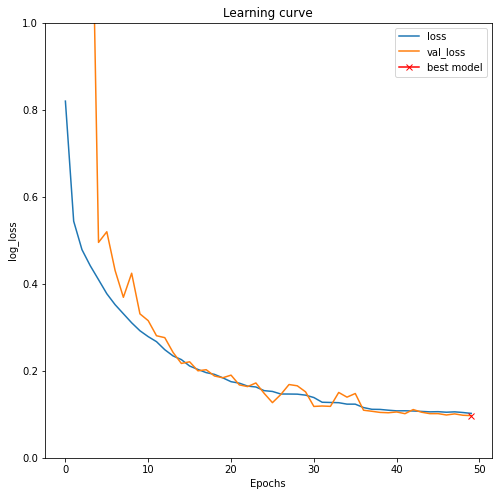

In [933]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")

#plt.plot(np.concatenate((results[3].history["loss"][1:], results[4].history["loss"], results[5].history["loss"])), label="loss")
#plt.plot(np.concatenate((results[3].history["val_loss"][1:], results[4].history["val_loss"], results[5].history["val_loss"])), label="val_loss")

plt.plot(results[-1].history["loss"], label="loss")
plt.plot(results[-1].history["val_loss"], label="val_loss")

#plt.plot(np.argmin(results[3].history["val_loss"][1:]), np.min(results[3].history["val_loss"][1:]), marker="x", color="r", label="best model(1)")
#plt.plot(np.argmin(results[4].history["val_loss"]) + 5, np.min(results[4].history["val_loss"]), marker="x", color="g", label="best model(2)")
#plt.plot(np.argmin(results[4].history["val_loss"]) + 24, np.min(results[5].history["val_loss"]), marker="x", color="b", label="best model(3)")

plt.plot(np.argmin(results[-1].history["val_loss"]), np.min(results[-1].history["val_loss"]), marker="x", color="r", label="best model")
plt.ylim([0,1])
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();
plt.savefig('learning_curve_8.png')

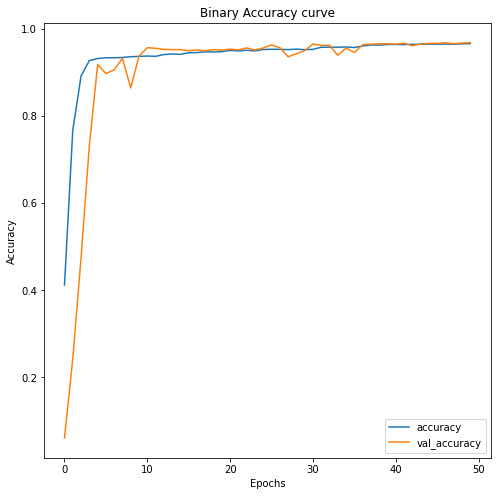

In [936]:
plt.figure(figsize=(8, 8))
plt.title("Binary Accuracy curve")

plt.plot(results[-1].history["binary_accuracy"], label="accuracy")
plt.plot(results[-1].history["val_binary_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='best');
plt.savefig('acc_curve_8.png')

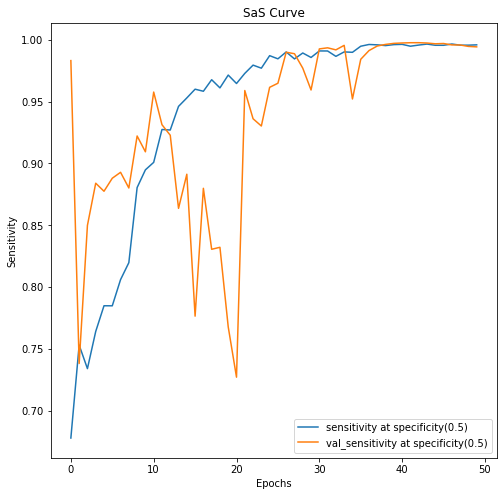

In [1103]:
plt.figure(figsize=(8, 8))
plt.title("SaS Curve")

plt.plot(results[-1].history["sensitivity_at_specificity"], label="sensitivity at specificity(0.5)")
plt.plot(results[-1].history["val_sensitivity_at_specificity"], label="val_sensitivity at specificity(0.5)")

plt.xlabel("Epochs")
plt.ylabel("Sensitivity")
plt.legend(loc='best');
plt.savefig('acc_curve_8.png')

In [862]:
model.load_weights('model-8-best.h5')

In [937]:
model.evaluate(X_valid, y_valid, verbose=0)

preds_train = model.predict(X_train, verbose=0)
preds_val = model.predict(X_valid, verbose=0)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

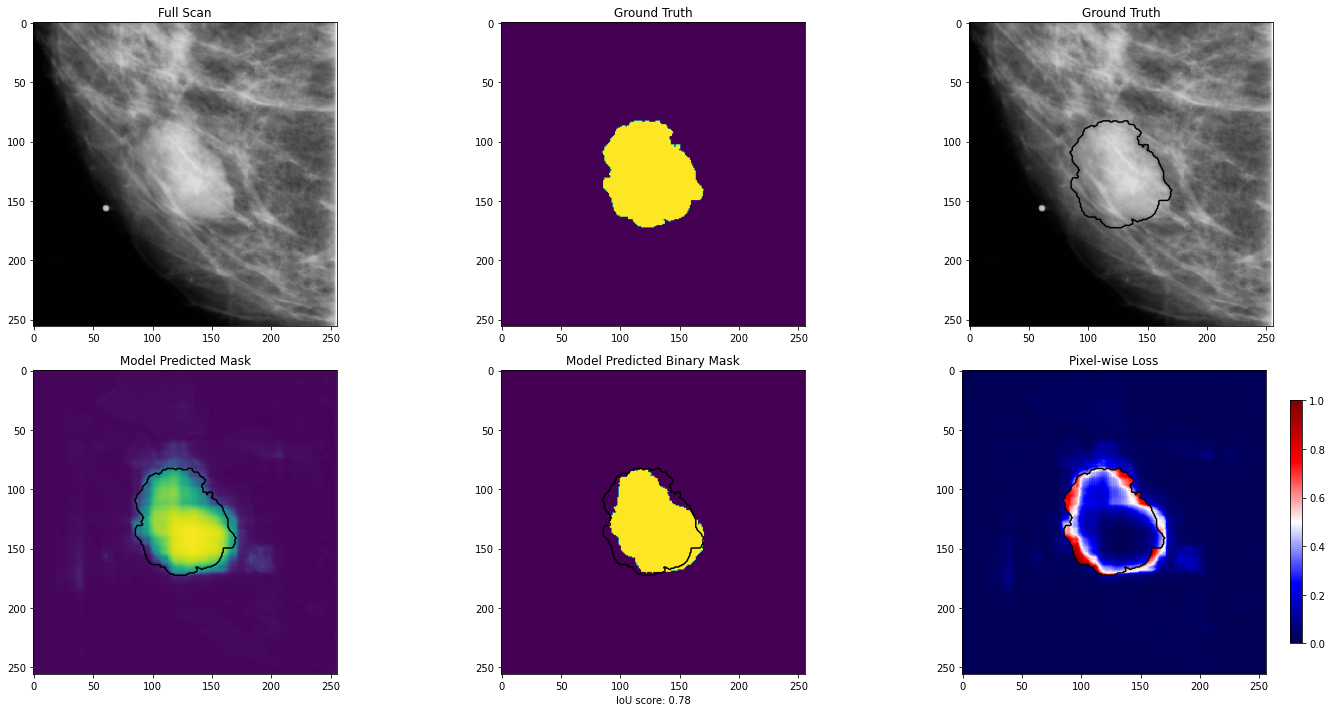

In [1076]:
plot_sample(X_train, y_train, preds_train, preds_train_t, filename='plots/Model_8/sample_2.png')

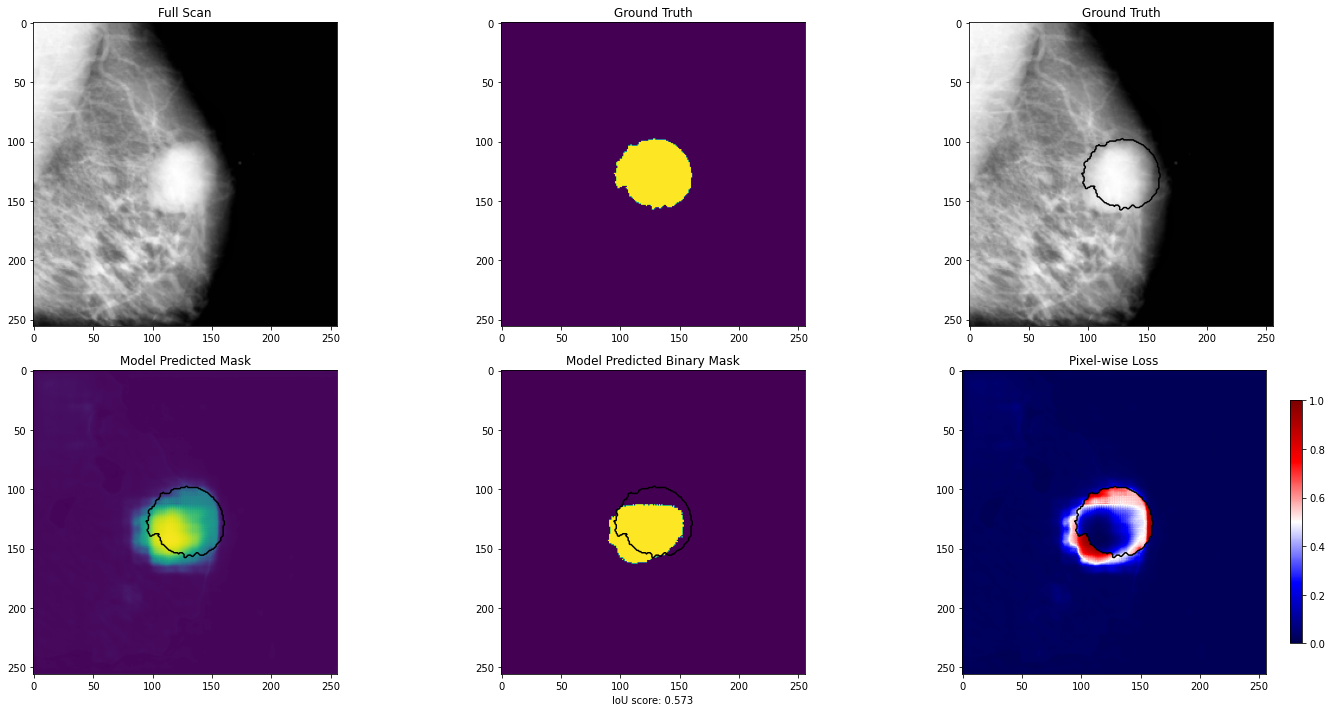

In [1083]:
plot_sample(X_valid, y_valid, preds_val, preds_val_t)

In [951]:
model.save('models/model_8.h5')

# Subset testing

## breast_density groupings

### High Density Scans

In [952]:
h_density_set, hd_num_samples = get_filtered_dataset(min_density=4)
hd_X, hd_y = split_XY(h_density_set)

model.evaluate(hd_X, hd_y, verbose=0)

hd_preds = model.predict(hd_X, verbose=0)
hd_preds_t = (hd_preds > 0.5).astype(np.uint8)

109


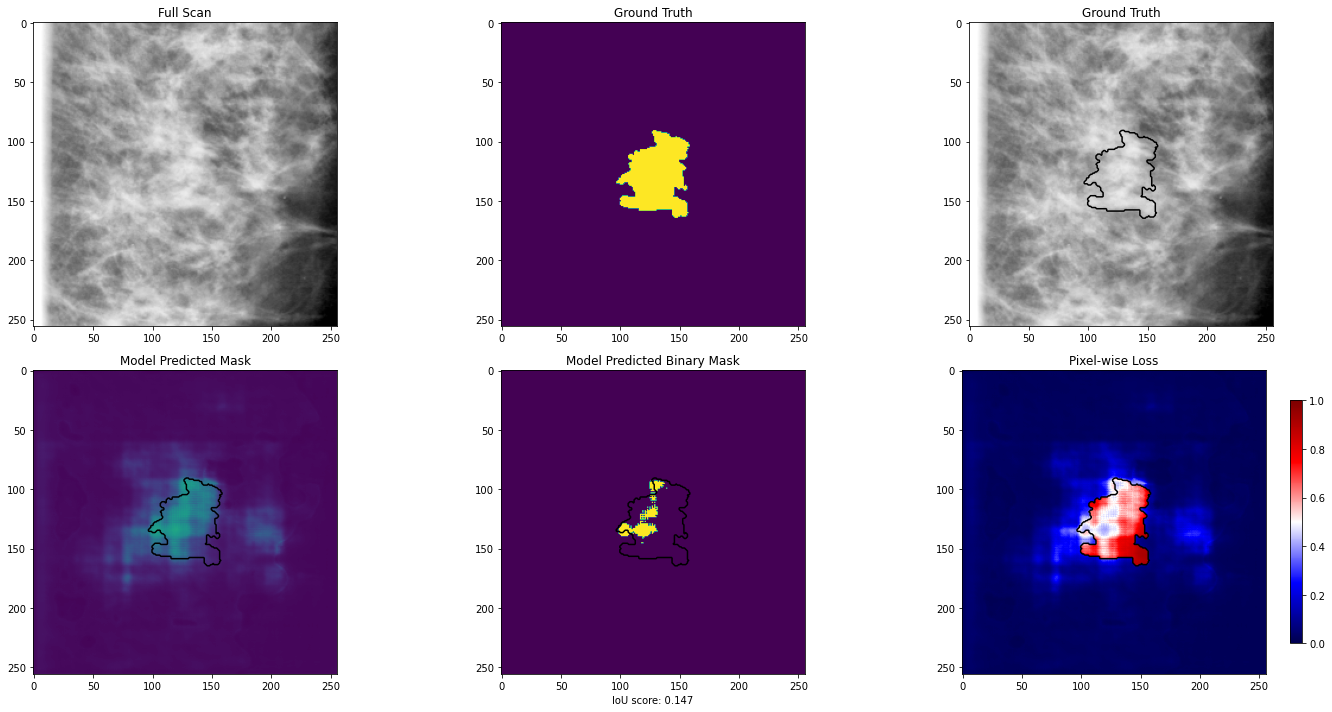

In [1084]:
plot_sample(hd_X, hd_y, hd_preds, hd_preds_t, filename='plots/Model_8/density/hd_1.png')

In [959]:
hd_iou = printStats(hd_preds_t, hd_y, 'hd')

IoU Stats 
  mean: 0.46926
  mean hit score: 0.50339
  miss rate: 0.0678
  max: 0.84097


### Low Density Scans

In [960]:
l_density_set, ld_num_samples = get_filtered_dataset(max_density=2)
ld_X, ld_y = split_XY(l_density_set)

model.evaluate(ld_X, ld_y, verbose=0)

ld_preds = model.predict(ld_X, verbose=0)
ld_preds_t = (ld_preds > 0.5).astype(np.uint8)

870


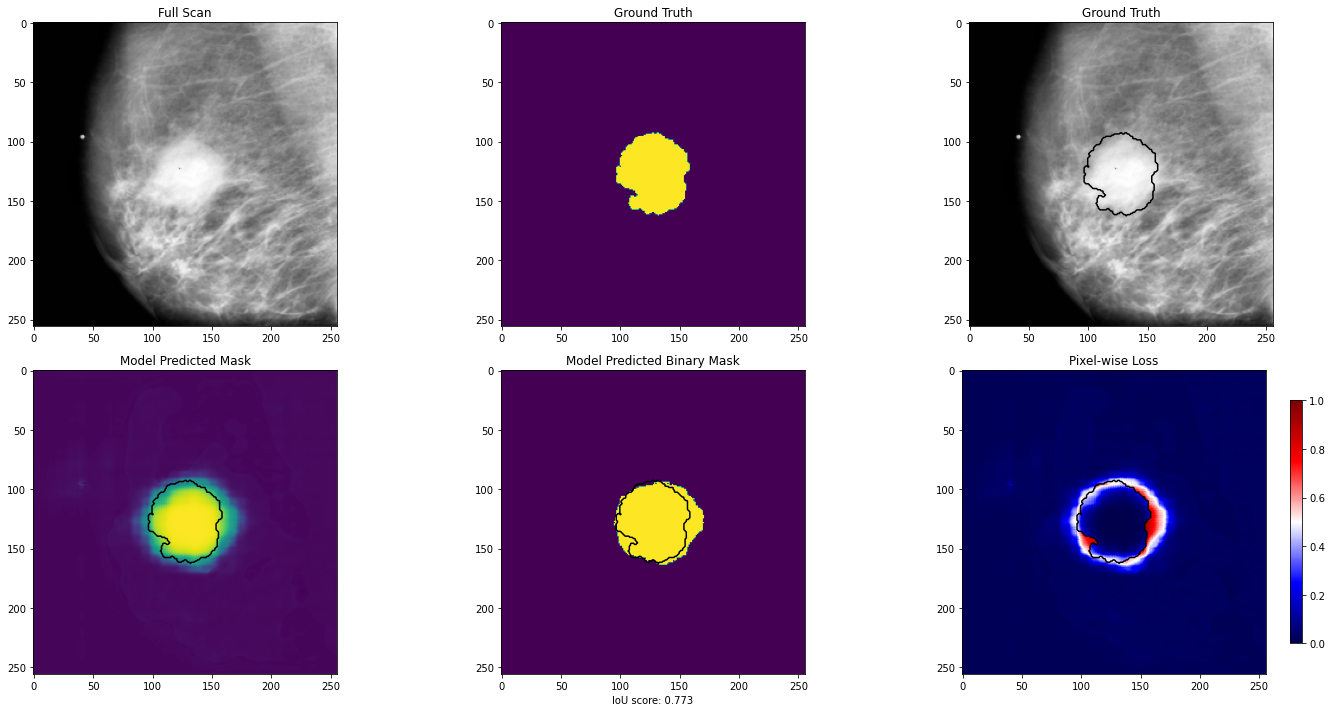

In [1086]:
plot_sample(ld_X, ld_y, ld_preds, ld_preds_t, filename='plots/Model_8/density/ld_1.png')

In [962]:
ld_iou = printStats(ld_preds_t, ld_y, 'ld')

IoU Stats 
  mean: 0.45309
  mean hit score: 0.57681
  miss rate: 0.21449
  max: 0.85907


### mid density scans

In [963]:
m_density_set, md_num_samples = get_filtered_dataset(min_density=3, max_density=3)
md_X, md_y = split_XY(m_density_set)

model.evaluate(md_X, md_y, verbose=0)

md_preds = model.predict(md_X, verbose=0)
md_preds_t = (md_preds > 0.5).astype(np.uint8)

337


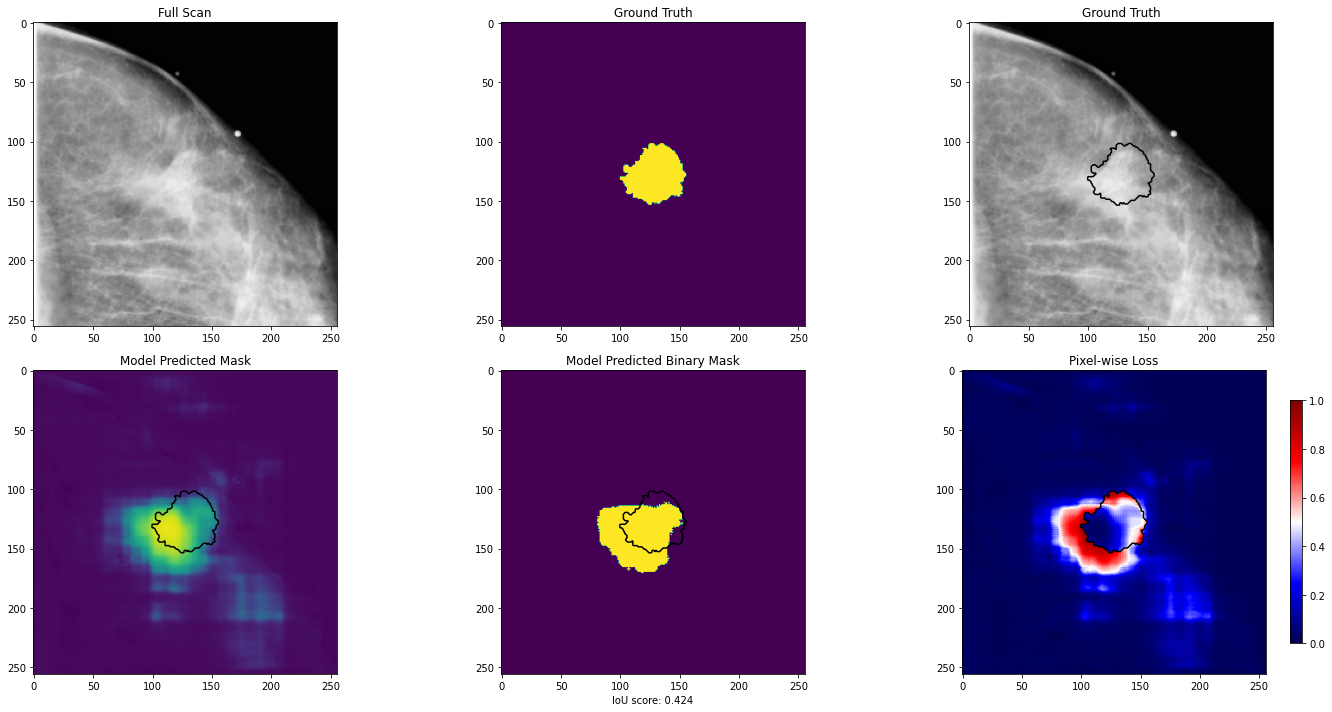

In [1087]:
plot_sample(md_X, md_y, md_preds, md_preds_t, filename='plots/Model_8/density/md_1.png')

In [965]:
md_iou = printStats(md_preds_t, md_y, 'md')

IoU Stats 
  mean: 0.44516
  mean hit score: 0.49719
  miss rate: 0.10465
  max: 0.86658


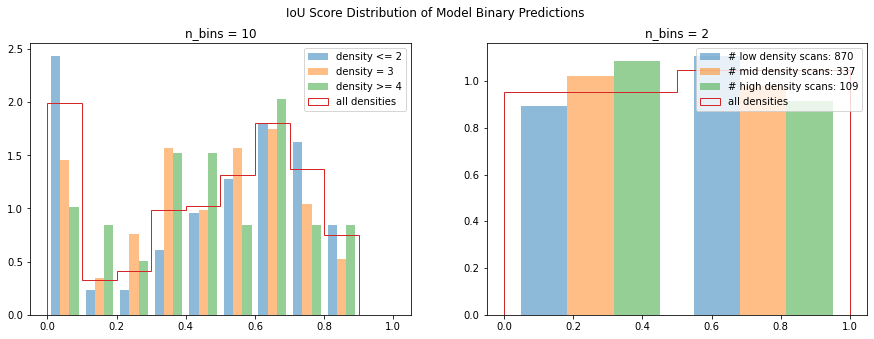

In [966]:
#d_labels_2 = ["# low density scans: {}".format(ld_num_samples), "# high density scans: {}".format(hd_num_samples)]
#iou_histogram(ld_iou, hd_iou, ['density <= 2', 'density >= 4'], d_labels_2)

d_labels_3 = ["# low density scans: {}".format(ld_num_samples),
              "# mid density scans: {}".format(md_num_samples),
              "# high density scans: {}".format(hd_num_samples),
             "# total scans: {}".format(ld_num_samples+md_num_samples+hd_num_samples)]

d_labels = ['density <= 2', 'density = 3', 'density >= 4', 'all densities']

all_d_iou = ld_iou + md_iou + hd_iou
iou_histogram([ld_iou, md_iou, hd_iou, all_d_iou], d_labels, d_labels_3, True)

## mass subtlety groupings

### High Subtlety scans

In [967]:
h_subtlety_set, hs_num_samples = get_filtered_dataset(min_subtlety=4)
hs_X, hs_y = split_XY(h_subtlety_set)

model.evaluate(hs_X, hs_y, verbose=0)

hs_preds = model.predict(hs_X, verbose=0)
hs_preds_t = (hs_preds > 0.5).astype(np.uint8)

918


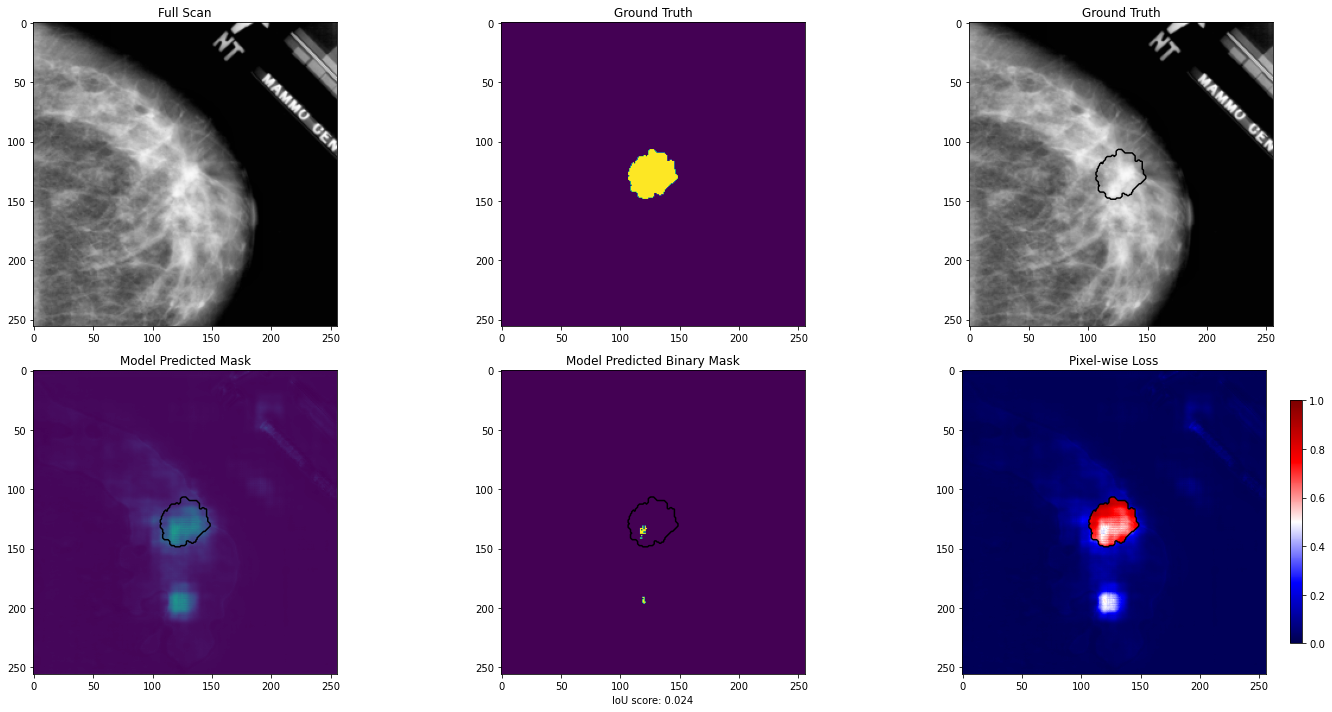

In [1088]:
plot_sample(hs_X, hs_y, hs_preds, hs_preds_t, filename='plots/Model_8/subtlety/hs_1.png')

In [969]:
hs_iou = printStats(hs_preds_t, hs_y, 'hs')

IoU Stats 
  mean: 0.50117
  mean hit score: 0.56734
  miss rate: 0.11663
  max: 0.86658


### Low Subtlety scans

In [970]:
l_subtlety_set, ls_num_samples = get_filtered_dataset(max_subtlety=2)
ls_X, ls_y = split_XY(l_subtlety_set)

model.evaluate(ls_X, ls_y, verbose=0)

ls_preds = model.predict(ls_X, verbose=0)
ls_preds_t = (ls_preds > 0.5).astype(np.uint8)

141


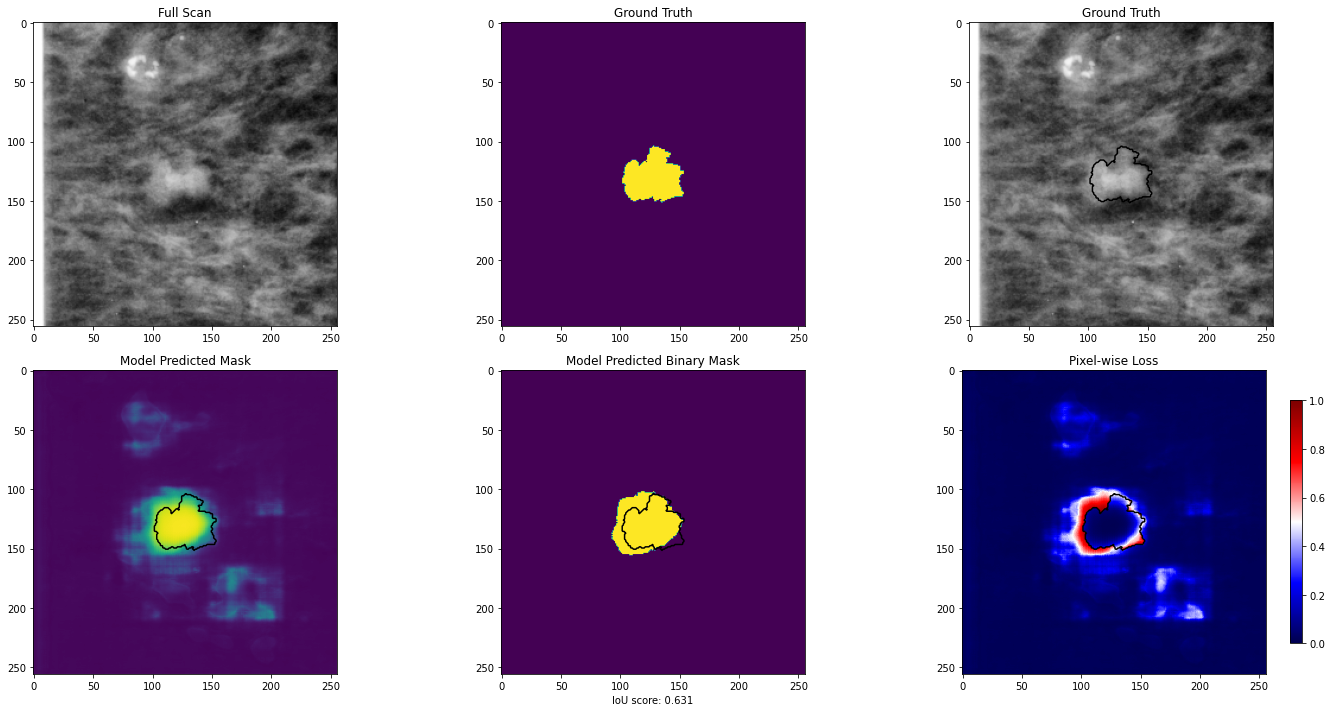

In [1104]:
plot_sample(ls_X, ls_y, ls_preds, ls_preds_t, filename='plots/Model_8/subtlety/ls_2.png')

In [972]:
ls_iou = printStats(ls_preds_t, ls_y, 'ls')

IoU Stats 
  mean: 0.35047
  mean hit score: 0.47999
  miss rate: 0.26984
  max: 0.81159


### Mid subtlety scans

In [973]:
m_subtlety_set, ms_num_samples = get_filtered_dataset(min_subtlety=3, max_subtlety=3)
ms_X, ms_y = split_XY(m_subtlety_set)

model.evaluate(ms_X, ms_y, verbose=0)

ms_preds = model.predict(ms_X, verbose=0)
ms_preds_t = (ms_preds > 0.5).astype(np.uint8)

257


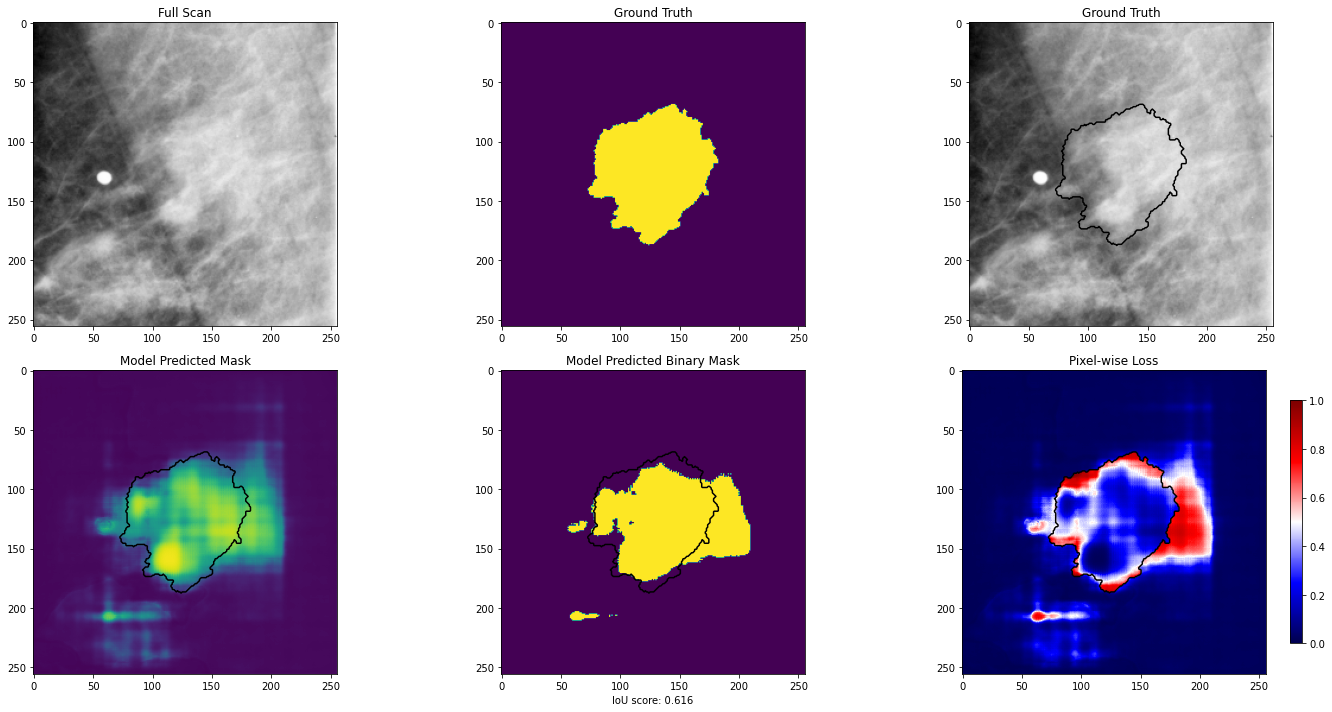

In [1105]:
plot_sample(ms_X, ms_y, ms_preds, ms_preds_t, filename='plots/Model_8/subtlety/ms_2.png')

In [975]:
ms_iou = printStats(ms_preds_t, ms_y, 'ms')

IoU Stats 
  mean: 0.332
  mean hit score: 0.46821
  miss rate: 0.29091
  max: 0.85907


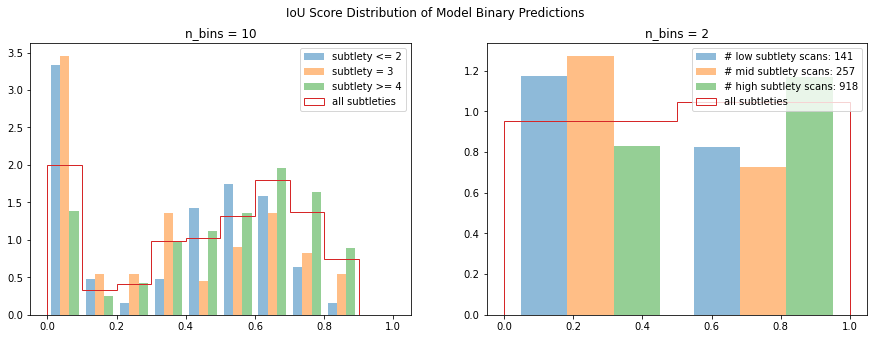

In [976]:
s_labels = ['subtlety <= 2', 'subtlety = 3', 'subtlety >= 4', 'all subtleties']
s_labels_3 = ["# low subtlety scans: {}".format(ls_num_samples),
              "# mid subtlety scans: {}".format(ms_num_samples),
              "# high subtlety scans: {}".format(hs_num_samples),
             "# total scans: {}".format(ls_num_samples+ms_num_samples+hs_num_samples)]

all_iou = ls_iou + ms_iou + hs_iou
iou_histogram([ls_iou, ms_iou, hs_iou, all_iou], s_labels, s_labels_3, True)

## View type groupings

### MLO views

In [977]:
mlo_set, mlo_num_samples = get_filtered_dataset(view="MLO")
mlo_X, mlo_y = split_XY(mlo_set)

model.evaluate(mlo_X, mlo_y, verbose=0)

mlo_preds = model.predict(mlo_X, verbose=0)
mlo_preds_t = (mlo_preds > 0.5).astype(np.uint8)

711


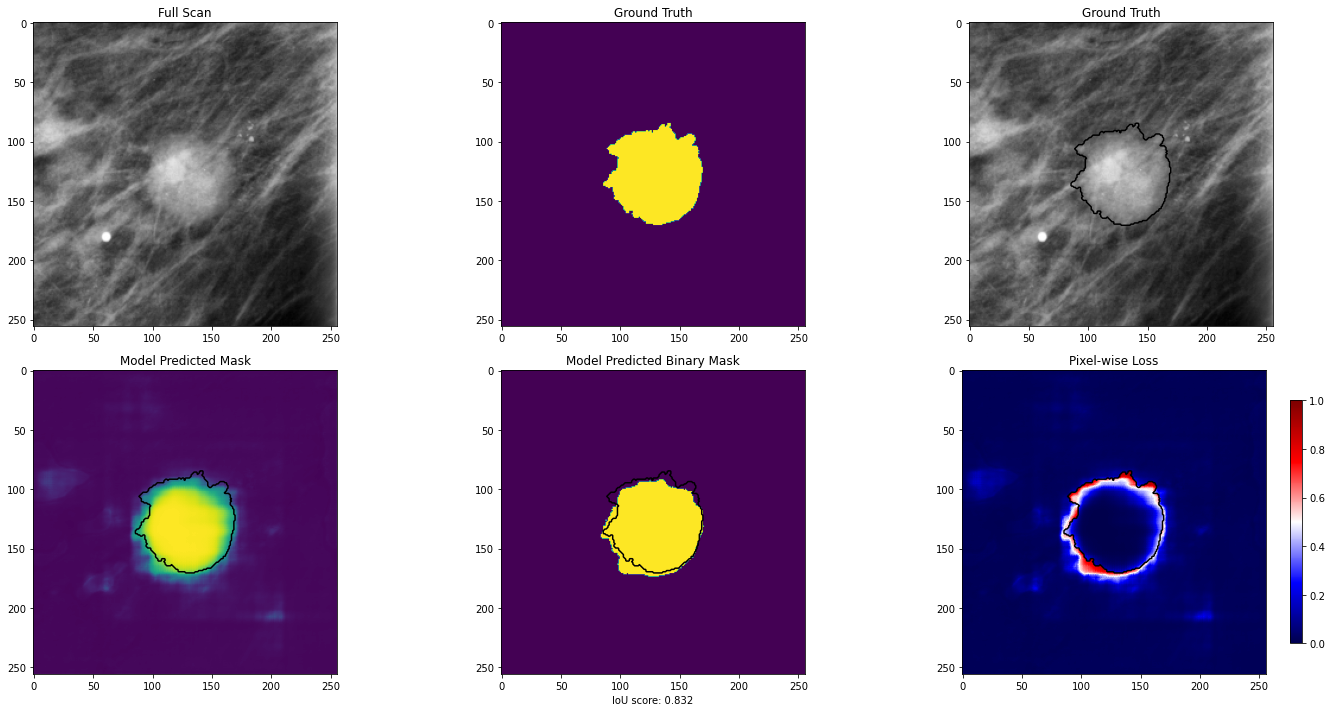

In [1091]:
plot_sample(mlo_X, mlo_y, mlo_preds, mlo_preds_t, filename='plots/Model_8/views/mlo_1.png')

In [979]:
mlo_iou = printStats(mlo_preds_t, mlo_y, 'mlo')

IoU Stats 
  mean: 0.44235
  mean hit score: 0.54065
  miss rate: 0.18182
  max: 0.86658


### CC views

In [980]:
cc_set, cc_num_samples = get_filtered_dataset(view="CC")
cc_X, cc_y = split_XY(cc_set)

model.evaluate(cc_X, cc_y, verbose=0)

cc_preds = model.predict(cc_X, verbose=0)
cc_preds_t = (cc_preds > 0.5).astype(np.uint8)

607


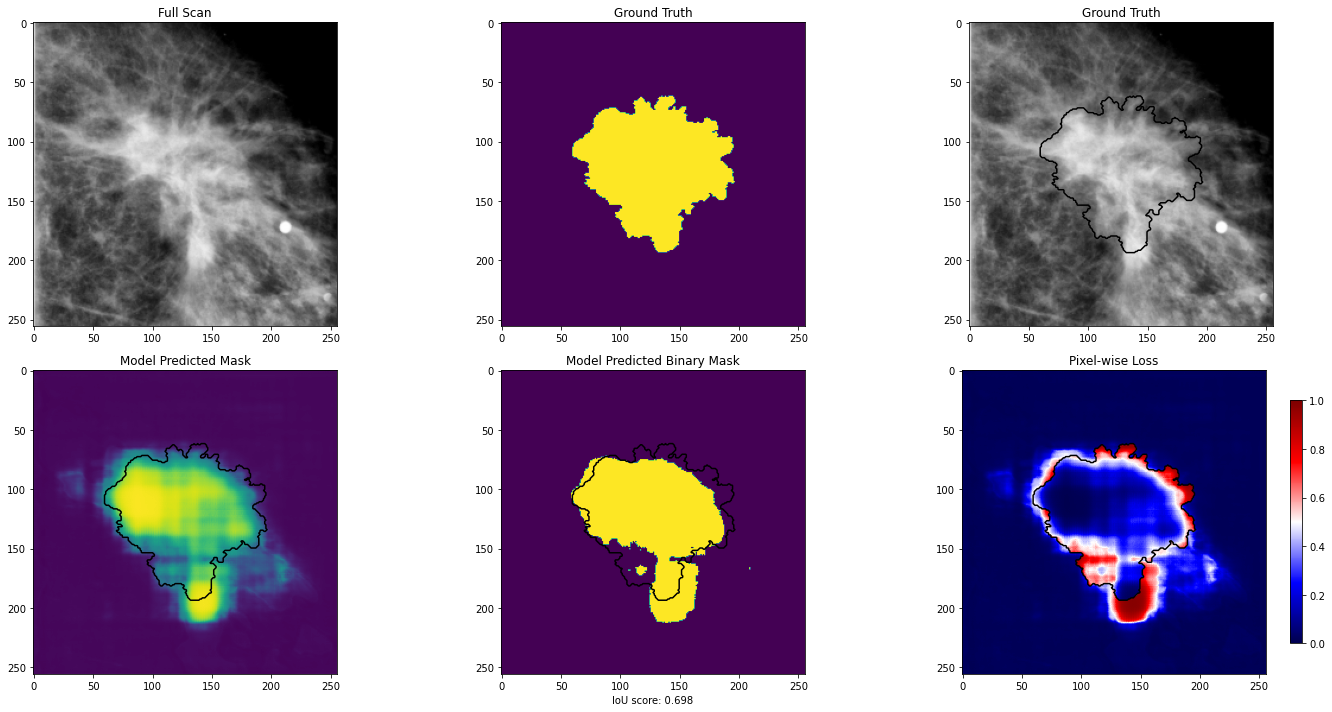

In [1093]:
plot_sample(cc_X, cc_y, cc_preds, cc_preds_t, filename='plots/Model_8/views/cc_1.png')

In [988]:
cc_iou = printStats(cc_preds_t, cc_y, 'cc')

IoU Stats 
  mean: 0.46455
  mean hit score: 0.54479
  miss rate: 0.14729
  max: 0.85907


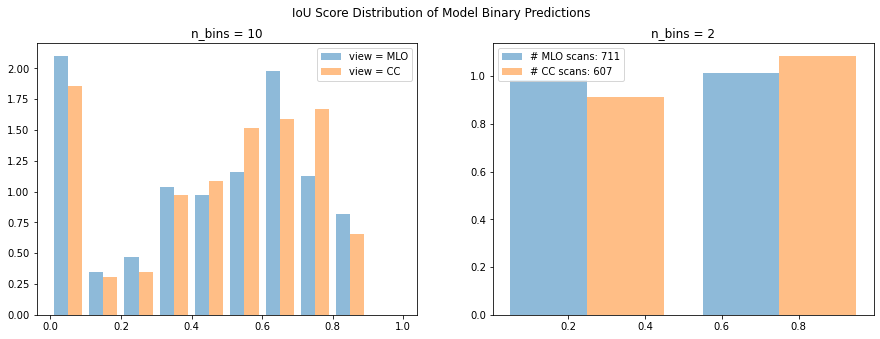

In [989]:
labels_2 = ["# MLO scans: {}".format(mlo_num_samples), "# CC scans: {}".format(cc_num_samples)]
iou_histogram([mlo_iou, cc_iou], ['view = MLO', 'view = CC'], labels_2)

## Pathology groupings

### Malignant group

In [990]:
mal_set, mal_num_samples = get_filtered_dataset(pathology=["MALIGNANT"])
mal_X, mal_y = split_XY(mal_set)

model.evaluate(mal_X, mal_y, verbose=0)

mal_preds = model.predict(mal_X, verbose=0)
mal_preds_t = (mal_preds > 0.5).astype(np.uint8)

637


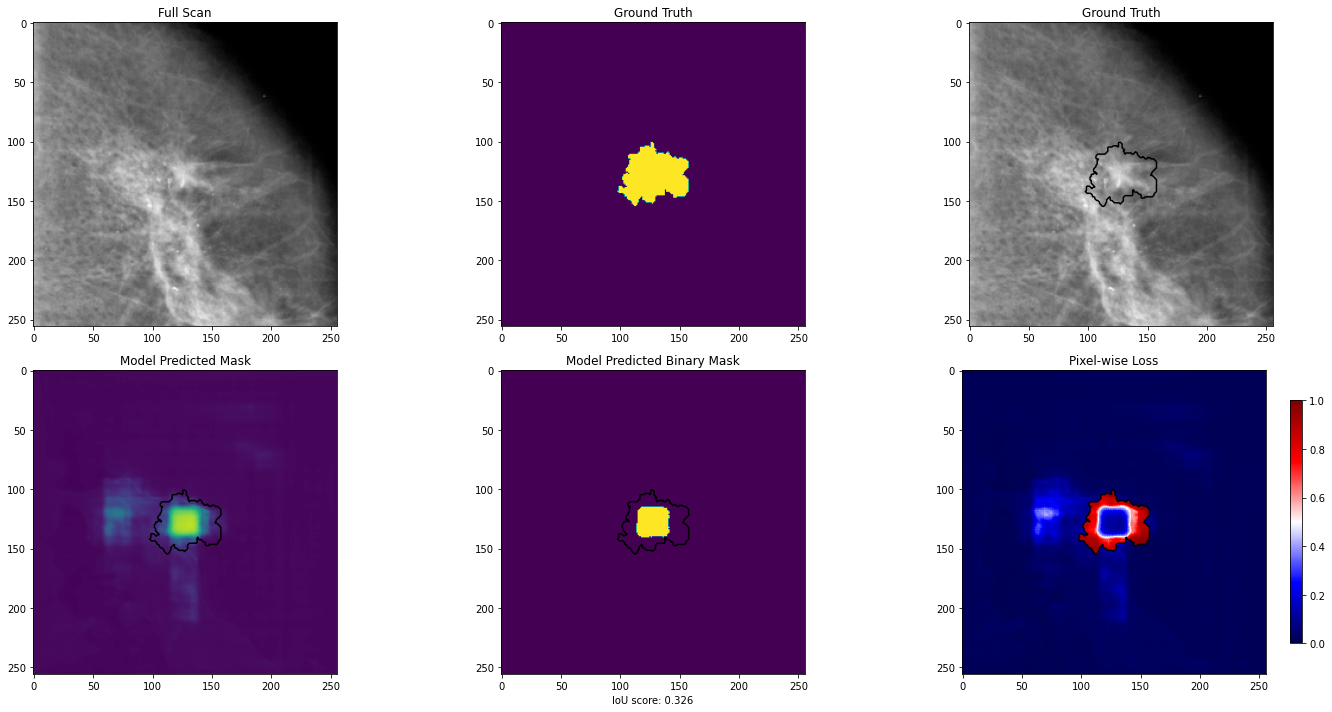

In [1094]:
plot_sample(mal_X, mal_y, mal_preds, mal_preds_t, filename='plots/Model_8/pathologies/mal_1.png')

In [992]:
mal_iou = printStats(mal_preds_t, mal_y, 'malignant')

IoU Stats 
  mean: 0.47788
  mean hit score: 0.55872
  miss rate: 0.14469
  max: 0.86658


### Benign group

In [993]:
ben_set, ben_num_samples = get_filtered_dataset(pathology=["BENIGN"])
ben_X, ben_y = split_XY(ben_set)

model.evaluate(ben_X, ben_y, verbose=0)

ben_preds = model.predict(ben_X, verbose=0)
ben_preds_t = (ben_preds > 0.5).astype(np.uint8)

577


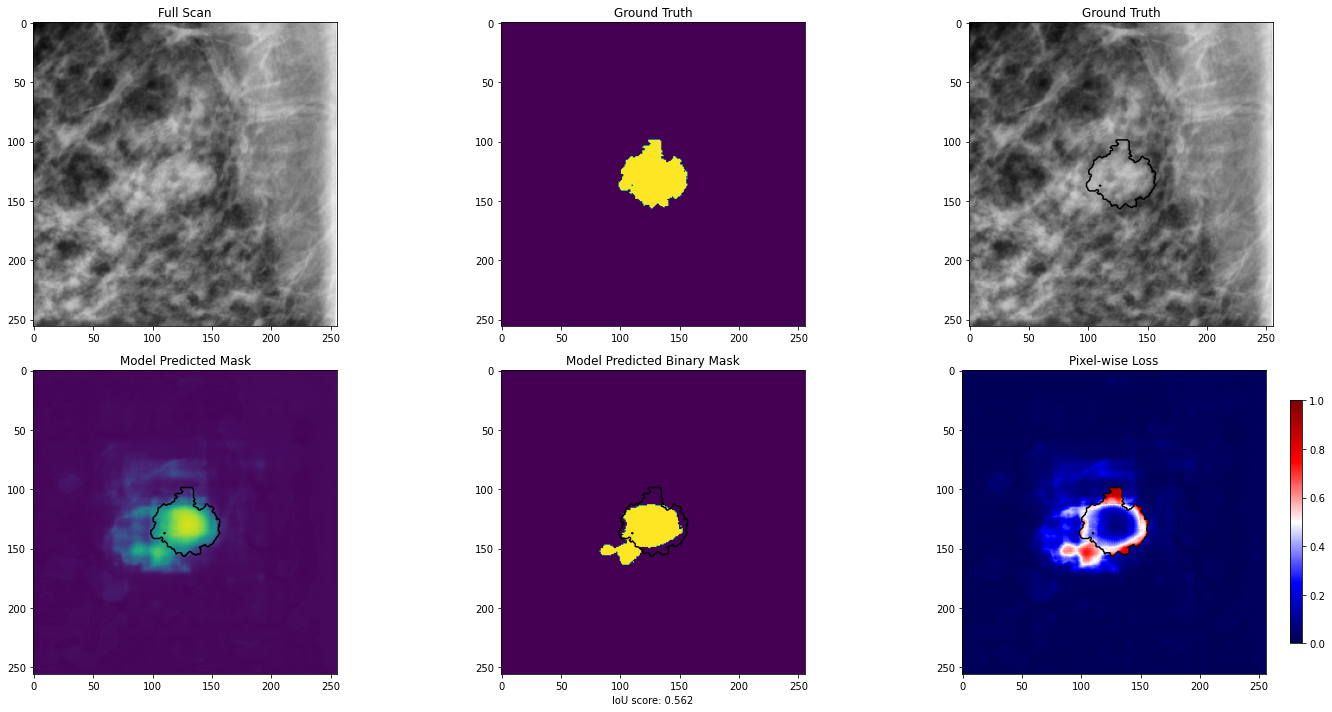

In [1095]:
plot_sample(ben_X, ben_y, ben_preds, ben_preds_t, filename='plots/Model_8/pathologies/ben_1.png')

In [995]:
ben_iou = printStats(ben_preds_t, ben_y, 'benign')

IoU Stats 
  mean: 0.42192
  mean hit score: 0.52683
  miss rate: 0.19913
  max: 0.85907


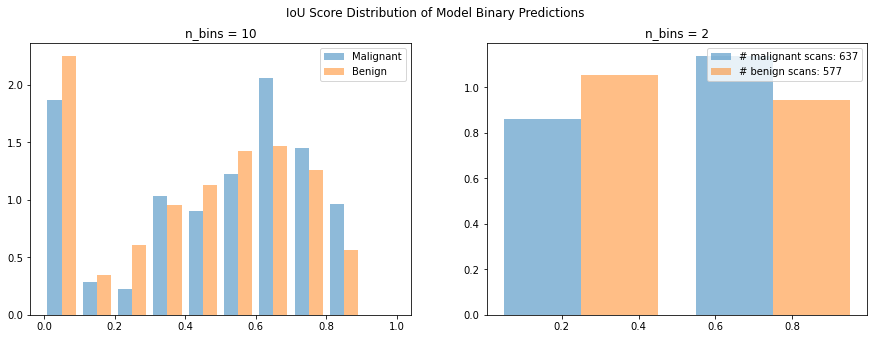

In [996]:
path_labels_2 = ["# malignant scans: {}".format(mal_num_samples), "# benign scans: {}".format(ben_num_samples)]
iou_histogram([mal_iou, ben_iou], ['Malignant', 'Benign'], path_labels_2)

## Assessment groupings

### Group 1: assessment range 0-0

In [997]:
ass1_set, ass1_num_samples = get_filtered_dataset(ass_rng=[0, 0])
ass1_X, ass1_y = split_XY(ass1_set)

model.evaluate(ass1_X, ass1_y, verbose=0)

ass1_preds = model.predict(ass1_X, verbose=0)
ass1_preds_t = (ass1_preds > 0.5).astype(np.uint8)

127


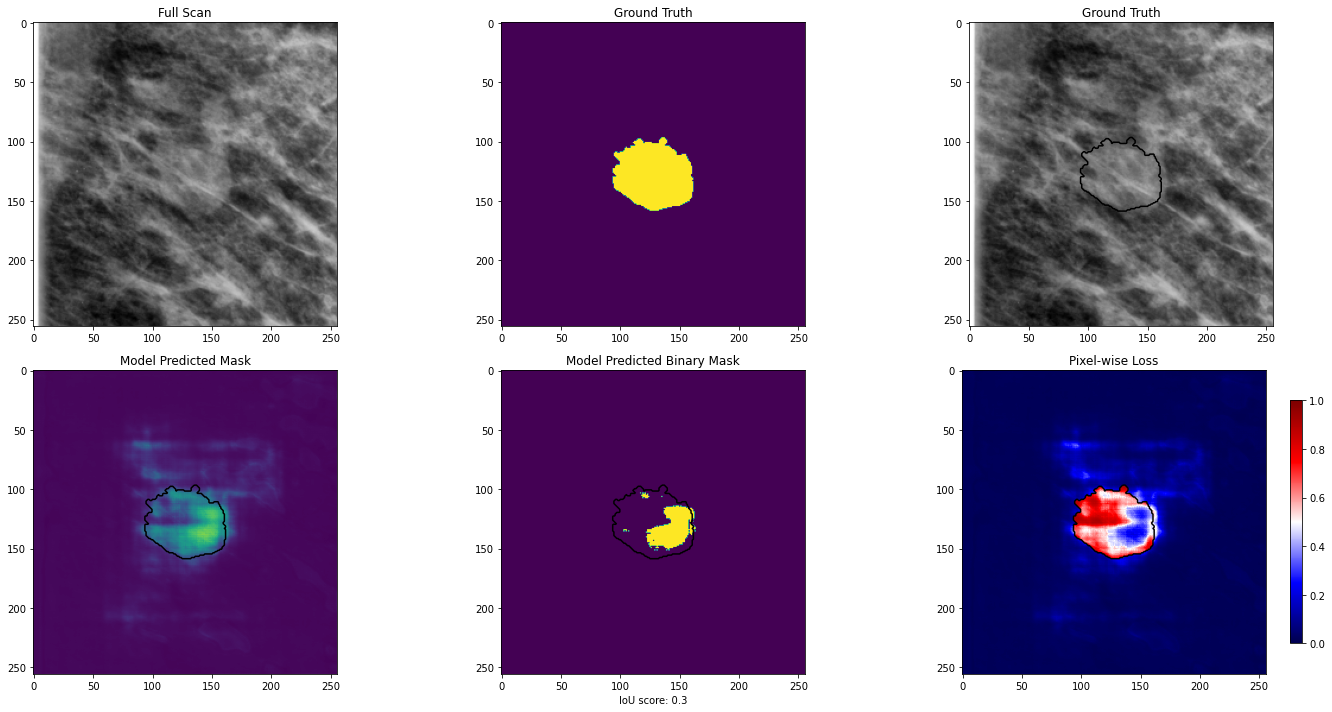

In [1096]:
plot_sample(ass1_X, ass1_y, ass1_preds, ass1_preds_t, filename='plots/Model_8/assessments/ass1_1.png')

In [999]:
ass1_iou = printStats(ass1_preds_t, ass1_y, 'ass1')

IoU Stats 
  mean: 0.41144
  mean hit score: 0.52458
  miss rate: 0.21569
  max: 0.81139


### Group 2: assessment range 2-3
(assessment=1 is a negative scan)

In [1000]:
ass2_set, ass2_num_samples = get_filtered_dataset(ass_rng=[2, 3])
ass2_X, ass2_y = split_XY(ass2_set)

model.evaluate(ass2_X, ass2_y, verbose=0)

ass2_preds = model.predict(ass2_X, verbose=0)
ass2_preds_t = (ass2_preds > 0.5).astype(np.uint8)

356


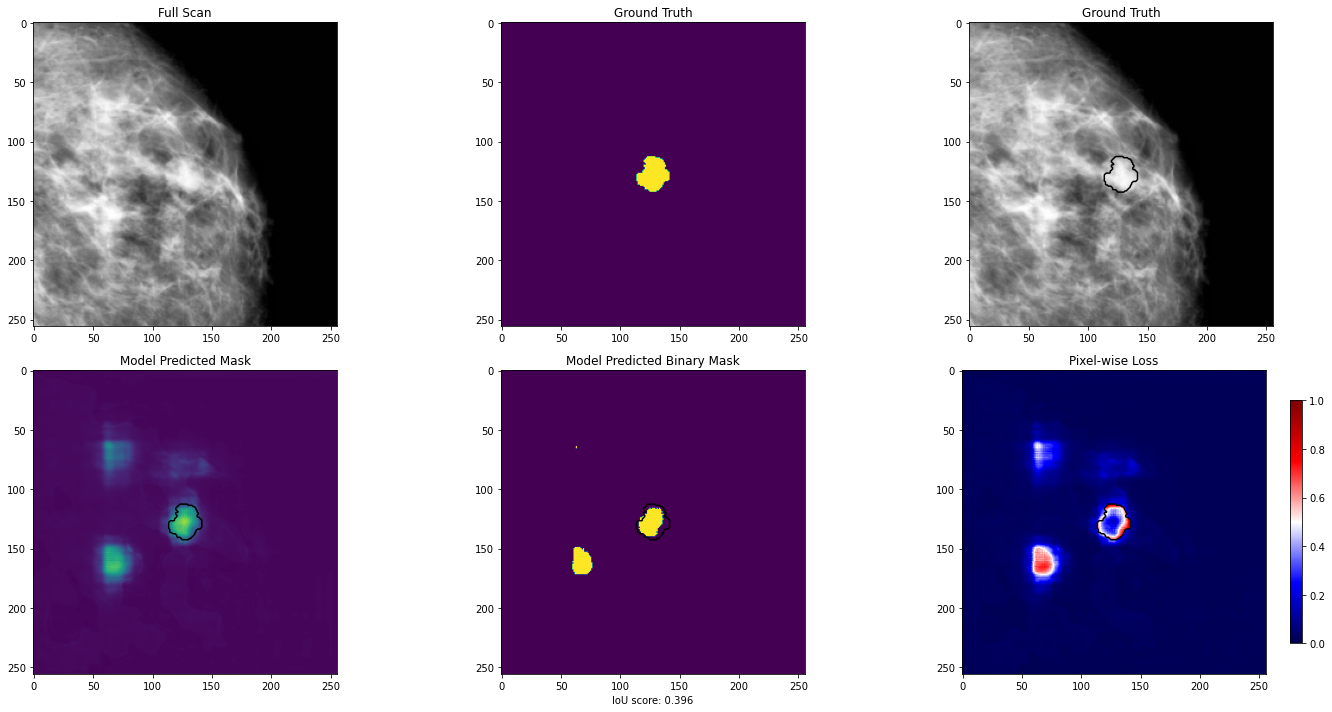

In [1097]:
plot_sample(ass2_X, ass2_y, ass2_preds, ass2_preds_t, filename='plots/Model_8/assessments/ass2_2.png')

In [1002]:
ass2_iou = printStats(ass2_preds_t, ass2_y, 'ass2')

IoU Stats 
  mean: 0.41641
  mean hit score: 0.52802
  miss rate: 0.21138
  max: 0.85907


### Group 3: assessment range 4-5

In [1003]:
ass3_set, ass3_num_samples = get_filtered_dataset(ass_rng=[4, 5])
ass3_X, ass3_y = split_XY(ass3_set)

model.evaluate(ass3_X, ass3_y, verbose=0)

ass3_preds = model.predict(ass3_X, verbose=0)
ass3_preds_t = (ass3_preds > 0.5).astype(np.uint8)

832


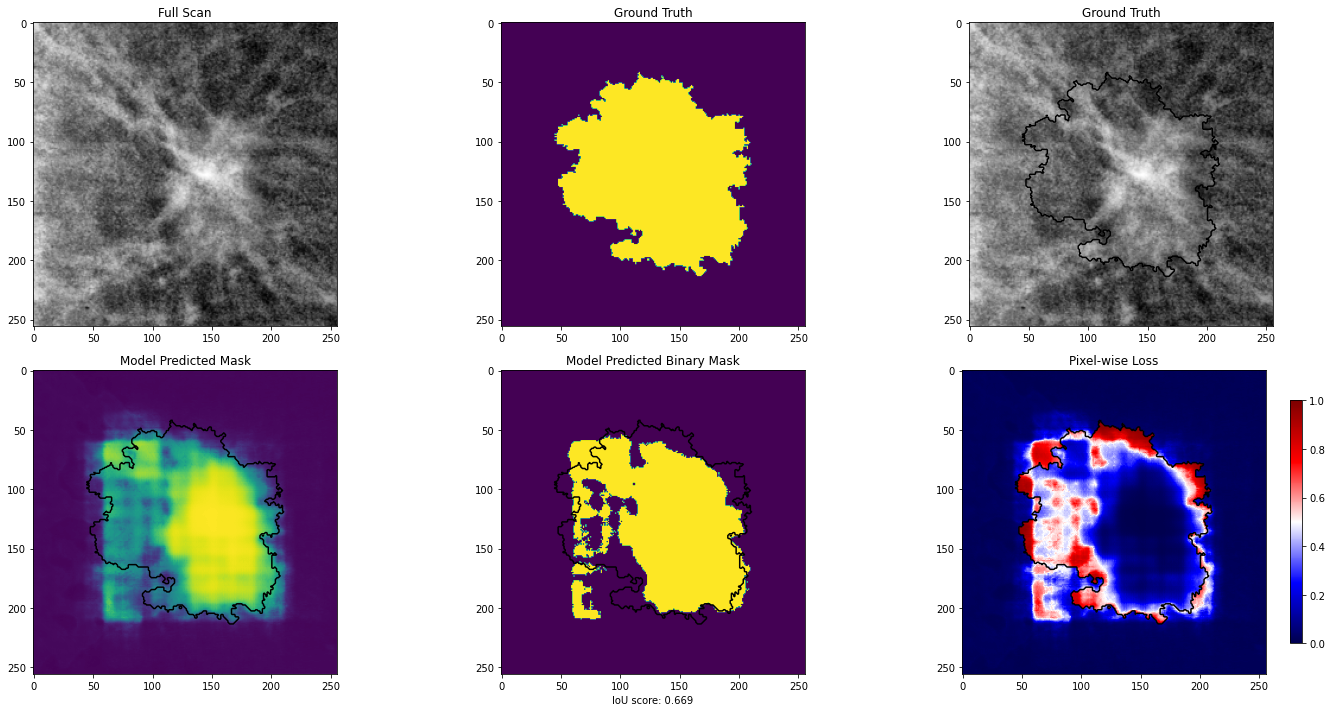

In [1098]:
plot_sample(ass3_X, ass3_y, ass3_preds, ass3_preds_t, filename='plots/Model_8/assessments/ass3_1.png')

In [1005]:
ass3_iou = printStats(ass3_preds_t, ass3_y, 'ass3')

IoU Stats 
  mean: 0.46858
  mean hit score: 0.54918
  miss rate: 0.14677
  max: 0.86658


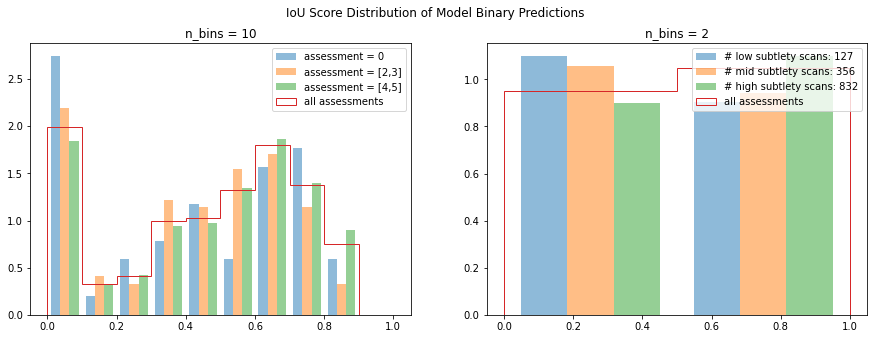

In [1006]:
ass_labels = ['assessment = 0', 'assessment = [2,3]', 'assessment = [4,5]', 'all assessments']
ass_labels_3 = ["# low subtlety scans: {}".format(ass1_num_samples),
              "# mid subtlety scans: {}".format(ass2_num_samples),
              "# high subtlety scans: {}".format(ass3_num_samples),
             "# total scans: {}".format(ass1_num_samples+ass2_num_samples+ass3_num_samples)]

ass_iou = ass1_iou + ass2_iou + ass3_iou
iou_histogram([ass1_iou, ass2_iou, ass3_iou, all_iou], ass_labels, ass_labels_3, True)

# Additional Statistical Analysis

['bngn.', 'malig.', 'cc', 'mlo', 'ms', 'ls', 'hs', 'md', 'ld', 'hd', 'ass1', 'ass2', 'ass3']


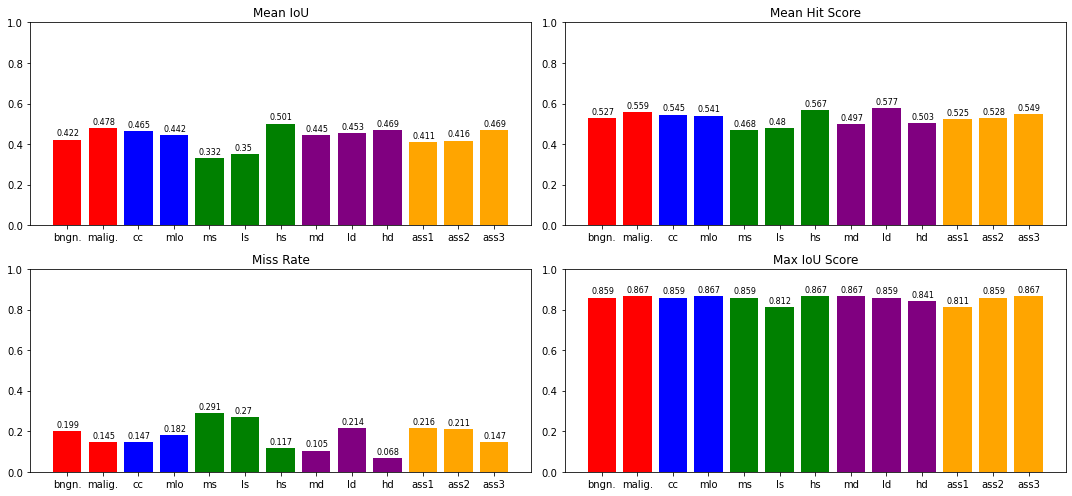

In [1007]:
x_labels = list(stats_dict.keys())
all_stats = list(stats_dict.items())
x_labels[0] = 'bngn.'
x_labels[1] = 'malig.'
colors = ['r', 'r', 'b', 'b', 'g', 'g', 'g', 'purple', 'purple', 'purple', 'orange', 'orange', 'orange']
titles = ['Mean IoU', 'Mean Hit Score', 'Miss Rate', 'Max IoU Score']
print(x_labels)
#print(all_stats)

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

for i in range(4):
    data = []
    for j in range(len(all_stats)):
        data.append(all_stats[j][1][i])
    ax[int(i/2)][i%2].bar(x=np.arange(len(x_labels)), height=data, tick_label=x_labels, color=colors)
    ax[int(i/2)][i%2].set_title(titles[i])
    ax[int(i/2)][i%2].set_ylim([0, 1])
    for idx, val in enumerate(data):
        ax[int(i/2)][i%2].text(x=idx-0.3 , y =val+0.02 , s=f"{round(val,3)}" , fontdict=dict(fontsize=8))
    
fig.tight_layout()
plt.savefig('plots/Model_8/overal_stats.png')
plt.show()

# Appendix

### Compute relevant Intersection over Union (IoU) statistics for model applied to dataset

In [649]:
stats_dict = {}

In [955]:
def write_stats_csv():
    with open('stats.csv', 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        items = stats_dict.items()
        header = ['model', 'Mean IoU', 'Mean Hit Score', 'Miss Rate', 'Max IoU Score']
        writer.writerow(header)
        for item in items:
            data = []
            data.append(item[0])
            for stat in item[1]:
                data.append(stat)
            writer.writerow(data)

In [651]:
def printStats(preds_t, y, key):
    iouArr = []
    for idx, sample in enumerate(preds_t):
        iouArr.append(IoUCalc(preds_t[idx], y[idx]))
    count = 0
    for x in iouArr:
        if x == 0:
            count += 1
            
    mean = np.mean(iouArr)
    miss_rate = count/len(iouArr)
    print("IoU Stats \n  mean: {}\n  mean hit score: {}\n  miss rate: {}\n  max: {}".format(
        round(mean, 5), round(mean/(1.-miss_rate), 5), round(miss_rate, 5), round(np.amax(iouArr), 5)))
    
    stats_dict[key] = ((round(mean, 5), round(mean/(1.-miss_rate), 5), round(miss_rate, 5), round(np.amax(iouArr), 5)))
    return iouArr

In [619]:
def IoUCalc(pred, truth):
    sideby = zip(np.ravel(pred), np.ravel(truth))
    overlap = 0
    total = 0
    for comp in sideby:
        if max(comp) > 0.5:
            total += 1
            if comp[0] > 0.5 and comp[1] > 0.5:
                overlap += 1
    if total == 0:
        return 0
    return overlap / total

### Boost contrast of input images using Contrast Limited Adaptive Histogram Equalization (CLAHE) method

In [810]:
def clahe(img, clip=2.0, tile=(8, 8)):
    img = cv2.normalize(
        img,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )
    img_uint8 = img.astype("uint8")

    clahe_create = cv2.createCLAHE(clipLimit=clip, tileGridSize=tile)
    clahe_img = clahe_create.apply(img_uint8)

    return clahe_img/(256/2)-1
    #return clahe_img

### Loop through rows in massDescriptions, use fields to compile matching images into single dataset

In [870]:
def get_filtered_dataset(min_density=1, min_subtlety=1, view=None, max_density=5, max_subtlety=5, pathology=['MALIGNANT', 'BENIGN'], ass_rng=[0, 5]):
    
    if view is not None:
        df = massDescriptions[massDescriptions['view'].isin([view])]
    elif len(pathology) == 1:
        df = massDescriptions[massDescriptions['pathology'].isin(pathology)]
    else:
        df = massDescriptions.loc[(massDescriptions['breast_density'] >= min_density) & 
                                  (massDescriptions['subtlety'] >= min_subtlety) &
                                  (massDescriptions['breast_density'] <= max_density) &
                                  (massDescriptions['subtlety'] <= max_subtlety) &
                                  (massDescriptions['assessment'] >= ass_rng[0]) &
                                  (massDescriptions['assessment'] <= ass_rng[1])
                                 ]
    #dataset = np.zeros((len(df.index), 256, 256, 2), dtype=np.float32)
    dataset = []
    n_samples = len(df.index)
    for i in range(len(df.index)):
        p_id = df.iloc[i]['patient_id']
        side = df.iloc[i]['side']
        view = df.iloc[i]['view']
        im_path = 'data/' + p_id[2:] + '/' + side + '_' + view + '.h5'
        try:
            with h5.File(im_path, 'r') as f:
                scan = np.array(f['data'][()])
                if np.amax(scan == 0):
                    continue
                mask = scan[:,:,1] > 0
                if np.mean(mask) > 0.5:
                    #print('skip')
                    continue
                dataset.append(scan)
        except:
            continue
            
    dataset = np.array(dataset)
    print(n_samples)
    return dataset, n_samples

In [831]:
def split_XY(dataset):
    im_height = 256
    im_width = 256

    X = np.zeros((len(dataset), im_height, im_width, 1), dtype=np.float32)
    y = np.zeros((len(dataset), im_height, im_width, 1), dtype=np.float32)

    for idx, img in enumerate(dataset):
        img = np.array(img)
        #Split img into scan and gt-mask, boost scan contrast
        X[idx,:,:,0] = clahe(img[:,:,0])
        y[idx,:,:,0] = img[:,:,1] > 0
        
    return X, y

### Bucket and display IOU score distributions for several sets of evaluations

In [890]:
def iou_histogram(ious, labels, labels_2, includes_cumulative=False):
    bins = np.linspace(0, 1, 11)
    bins_2 = np.linspace(0, 1, 3)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    if includes_cumulative:
        ax[0].hist(ious[:-1], bins, alpha=0.5, label=labels[:-1], density=True)
        ax[0].hist(ious[-1], bins, label=labels[-1], histtype='step', density=True)
        ax[1].hist(ious[:-1], bins_2, alpha=0.5, label=labels_2[:-1], density=True)
        ax[1].hist(ious[-1], bins_2, label=labels[-1], histtype='step', density=True)
    else:
        ax[0].hist(ious, bins, alpha=0.5, label=labels, density=True)
        ax[1].hist(ious, bins_2, alpha=0.5, label=labels_2, density=True)
    
    ax[0].legend(loc='best')
    ax[0].set_title('n_bins = 10')
    ax[1].set_title('n_bins = 2')
    plt.legend(loc='best')
    

    plt.suptitle("IoU Score Distribution of Model Binary Predictions")
    plt.show()

### Plot input, ground-truth output, model output, and binary model output of random sample in the input set

In [1066]:
def plot_sample(X, y, preds, binary_preds, idx=None, filename=None):
    if idx is None:
        idx = random.randint(0, len(X))

    has_mask = y[idx].max() > 0
    IoU = IoUCalc(binary_preds[idx], y[idx])

    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    
    ax[0][0].imshow(X[idx, ..., 0], cmap='gray')
    ax[0][0].set_title('Full Scan')
    #ax[0].contour(y[idx].squeeze(), colors='k', levels=[0.5])

    ax[0][1].imshow(y[idx].squeeze())
    ax[0][1].set_title('Ground Truth')
    
    ax[0][2].imshow(X[idx, ..., 0], cmap='gray')
    ax[0][2].set_title('Ground Truth')
    if has_mask:
        ax[0][2].contour(y[idx].squeeze(), colors='k', levels=[0.5])

    ax[1][0].imshow(preds[idx].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[1][0].contour(y[idx].squeeze(), colors='k', levels=[0.5])
    ax[1][0].set_title('Model Predicted Mask')
    
    ax[1][1].imshow(binary_preds[idx].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[1][1].contour(y[idx].squeeze(), colors='k', levels=[0.5])
    ax[1][1].set_title('Model Predicted Binary Mask');
    ax[1][1].set_xlabel("IoU score: {}".format(round(IoU, 3)))
    
    #print(preds[idx].shape)
    #print(heights)
    #ax[4].hist(preds[idx][:,:,0], 20, density=True)
    #ax[4].set_ylim([0,1])
    x = ax[1][2].imshow((abs(y[idx] - preds[idx])).squeeze(), vmin=0, vmax=1, cmap='seismic')
    CB = plt.colorbar(x, ax=ax[1][2], orientation="vertical", shrink=0.8)
    ll, bb, ww, hh = CB.ax.get_position().bounds
    #CB.ax.set_position([ll, h, ww, h*0.8])
    if has_mask:
        ax[1][2].contour(y[idx].squeeze(), colors='k', levels=[0.5])
    ax[1][2].set_title('Pixel-wise Loss')
    
    
    fig.tight_layout()
    
    if filename is not None:
        plt.savefig(filename)

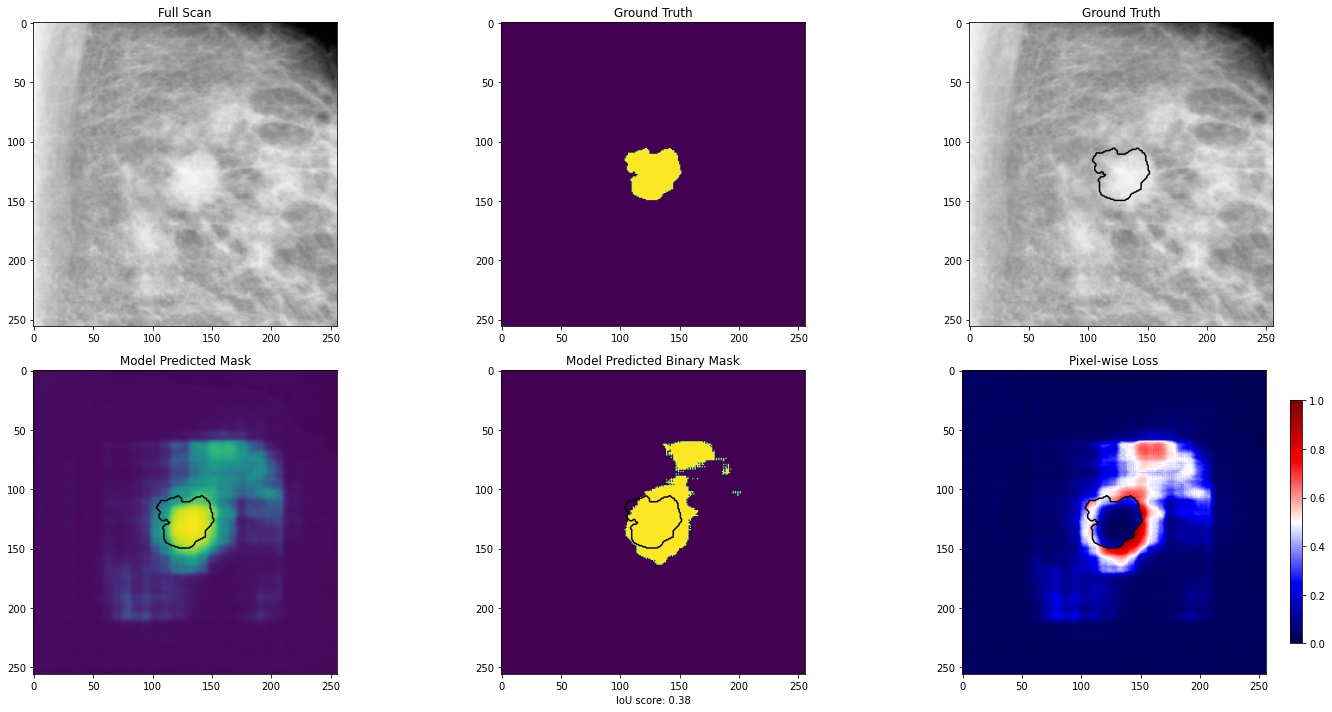

In [1074]:
plot_sample(ass3_X, ass3_y, ass3_preds, ass3_preds_t)

0.3429774 -0.6570226 2.6077032e-08


(array([[253.,   1.,   1., ...,   0.,   0.,   0.],
        [252.,   1.,   2., ...,   0.,   0.,   0.],
        [247.,   2.,   1., ...,   0.,   1.,   0.],
        ...,
        [  8.,   1.,   0., ...,   0.,   1., 245.],
        [  9.,   0.,   0., ...,   0.,   1., 245.],
        [  8.,   0.,   0., ...,   0.,   0., 246.]]),
 array([-0.6570226 , -0.5570226 , -0.4570226 , -0.35702258, -0.2570226 ,
        -0.1570226 , -0.05702259,  0.0429774 ,  0.1429774 ,  0.24297741,
         0.3429774 ], dtype=float32),
 <a list of 256 BarContainer objects>)

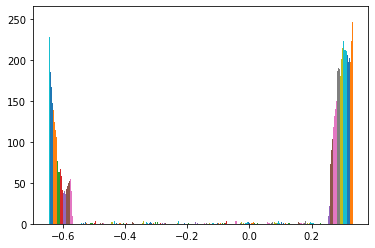

In [825]:
mask = np.array(y[41][:,:,0])
print(mask[100][100], mask[0][0], np.mean(mask))
plt.hist(mask, 10)

In [1008]:
write_stats_csv()